In [1]:
import warnings
import pathlib
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import intake
import healpy

In [2]:
cat = intake.open_catalog(
    '/work/bm1235/k203123/nextgems_prefinal/experiments/ngc4008a/outdata/ngc4008a.yaml'
)
ds_icon_inst = cat.ngc4008a(chunks="auto", zoom=9, time='PT15M').to_dask()
ds_icon_inst_1 = ds_icon_inst.sel(time=slice('2021-07-01-00:00:00', '2021-07-08-00:00:00'))
ds_icon_inst_2 = ds_icon_inst.sel(time=slice('2033-07-01-00:00:00', '2033-07-08-00:00:00'))

/home/b/b382728/miniconda3/envs/tobac/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [3]:
ds_icon_inst_1

<xarray.Dataset> Size: 8TB
Dimensions:     (time: 672, level_full: 90, cell: 3145728, crs: 1,
                 level_half: 91)
Coordinates:
  * crs         (crs) float32 4B nan
  * level_full  (level_full) int32 360B 1 2 3 4 5 6 7 8 ... 84 85 86 87 88 89 90
  * level_half  (level_half) int32 364B 1 2 3 4 5 6 7 8 ... 85 86 87 88 89 90 91
  * time        (time) datetime64[ns] 5kB 2021-07-01T00:15:00 ... 2021-07-08
    zg          (level_full, cell) float32 1GB dask.array<chunksize=(60, 524288), meta=np.ndarray>
    zghalf      (level_half, cell) float32 1GB dask.array<chunksize=(62, 524288), meta=np.ndarray>
Dimensions without coordinates: cell
Data variables: (12/15)
    cli         (time, level_full, cell) float32 761GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    clw         (time, level_full, cell) float32 761GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    dzghalf     (level_full, cell) float32 1GB dask.array<chunksize=(60, 524288), meta=np.ndarray>
    hus         (time, level_full, cell) float32 761GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    pfull       (time, level_full, cell) float32 761GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    pr          (time, cell) float32 8GB dask.array<chunksize=(32, 524288), meta=np.ndarray>
    ...          ...
    rlut        (time, cell) float32 8GB dask.array<chunksize=(32, 524288), meta=np.ndarray>
    ta          (time, level_full, cell) float32 761GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    ts          (time, cell) float32 8GB dask.array<chunksize=(32, 524288), meta=np.ndarray>
    ua          (time, level_full, cell) float32 761GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    va          (time, level_full, cell) float32 761GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    wa_phy      (time, level_half, cell) float32 769GB dask.array<chunksize=(1, 31, 262144), meta=np.ndarray>

In [4]:
ds_icon_inst_2

<xarray.Dataset> Size: 8TB
Dimensions:     (time: 673, level_full: 90, cell: 3145728, crs: 1,
                 level_half: 91)
Coordinates:
  * crs         (crs) float32 4B nan
  * level_full  (level_full) int32 360B 1 2 3 4 5 6 7 8 ... 84 85 86 87 88 89 90
  * level_half  (level_half) int32 364B 1 2 3 4 5 6 7 8 ... 85 86 87 88 89 90 91
  * time        (time) datetime64[ns] 5kB 2033-07-01 ... 2033-07-08
    zg          (level_full, cell) float32 1GB dask.array<chunksize=(60, 524288), meta=np.ndarray>
    zghalf      (level_half, cell) float32 1GB dask.array<chunksize=(62, 524288), meta=np.ndarray>
Dimensions without coordinates: cell
Data variables: (12/15)
    cli         (time, level_full, cell) float32 762GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    clw         (time, level_full, cell) float32 762GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    dzghalf     (level_full, cell) float32 1GB dask.array<chunksize=(60, 524288), meta=np.ndarray>
    hus         (time, level_full, cell) float32 762GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    pfull       (time, level_full, cell) float32 762GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    pr          (time, cell) float32 8GB dask.array<chunksize=(1, 524288), meta=np.ndarray>
    ...          ...
    rlut        (time, cell) float32 8GB dask.array<chunksize=(1, 524288), meta=np.ndarray>
    ta          (time, level_full, cell) float32 762GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    ts          (time, cell) float32 8GB dask.array<chunksize=(1, 524288), meta=np.ndarray>
    ua          (time, level_full, cell) float32 762GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    va          (time, level_full, cell) float32 762GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    wa_phy      (time, level_half, cell) float32 771GB dask.array<chunksize=(1, 31, 262144), meta=np.ndarray>

In [5]:
ds_icon_inst_1.wa_phy

<xarray.DataArray 'wa_phy' (time: 672, level_half: 91, cell: 3145728)> Size: 769GB
dask.array<getitem, shape=(672, 91, 3145728), dtype=float32, chunksize=(1, 31, 262144), chunktype=numpy.ndarray>
Coordinates:
  * level_half  (level_half) int32 364B 1 2 3 4 5 6 7 8 ... 85 86 87 88 89 90 91
  * time        (time) datetime64[ns] 5kB 2021-07-01T00:15:00 ... 2021-07-08
    zghalf      (level_half, cell) float32 1GB dask.array<chunksize=(62, 524288), meta=np.ndarray>
Dimensions without coordinates: cell
Attributes:
    cell_methods:  time: point
    component:     atmo
    grid_mapping:  crs
    long_name:     vertical velocity
    units:         m s-1
    vgrid:         reference_half

In [6]:
lon = xr.DataArray(np.arange(0.05, 360, 0.1), dims=("lon",), name="lon", attrs=dict(units="degrees", standard_name="longitude"))
lat = xr.DataArray(np.arange(59.95, -60, -0.1), dims=("lat",), name="lat", attrs=dict(units="degrees", standard_name="latitude"))

pix = xr.DataArray(
    healpy.ang2pix(ds_icon_inst_1.crs.healpix_nside, *np.meshgrid(lon, lat), nest=True, lonlat=True),
    coords=(lat, lon),
)


In [7]:
# w = ds_icon_inst_1.wa_phy.isel(time=slice(0,4), level_half=slice(41,91), cell=pix)
w = ds_icon_inst_1.wa_phy.drop_vars("zghalf").isel(time=slice(0,4)).compute().isel(cell=pix)

In [8]:
w

<xarray.DataArray 'wa_phy' (time: 4, level_half: 91, lat: 1200, lon: 3600)> Size: 6GB
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[-1.41680721e-04, -1.41680721e-04, -1.41680721e-04, ...,
          -1.17593985e-02, -1.17593985e-02, -1.17593985e-02],
         [ 1.62596849e-03,  1.62596849e-03,  1.62596849e-03, ...,
          -1.05329296e-02, -1.05329296e-02, -1.05329296e-02],
         [ 4.42343531e-03,  4.24015149e-03,  4.24015149e-03, ...,
          -9.18802805e-03, -9.18802805e-03, -9.59854759e-03],
...
           1.59289521e-05,  1.59289521e-05,  6.86077052e-04],
         [-4.65863850e-04, -4.65863850e-04, -4.65863850e-04, ...,
          -4.86852397e-04, -4.86852397e-04, -4.86852397e-04],
         [-5.59078588e-04, -5.59078588e-04, -5.59078588e-04, ...,
          -4.40164062e-04, -4.40164062e-04, -4.40164062e-04]],

        [[ 2.60198918e-10,  2.60198918e-10,  2.60198918e-10, ...,
           2.05844564e-09,  2.05844564e-09,  2.05844564e-09],
         [-3.69928144e-10, -3.69928144e-10, -3.69928144e-10, ...,
          -1.62141611e-09, -1.62141611e-09, -1.62141611e-09],
         [-3.37830180e-10, -4.89003837e-10, -4.89003837e-10, ...,
          -3.41804118e-09, -3.41804118e-09, -2.51339061e-09],
         ...,
         [-7.84575364e-15, -1.82059127e-14, -1.82059127e-14, ...,
           6.48655417e-15,  6.48655417e-15,  1.11792687e-14],
         [ 1.18787274e-14,  1.18787274e-14,  1.18787274e-14, ...,
           1.47269790e-14,  1.47269790e-14,  1.47269790e-14],
         [-1.03529517e-14, -1.03529517e-14, -1.03529517e-14, ...,
           1.18986657e-15,  1.18986657e-15,  1.18986657e-15]]]],
      dtype=float32)
Coordinates:
  * level_half  (level_half) int32 364B 1 2 3 4 5 6 7 8 ... 85 86 87 88 89 90 91
  * time        (time) datetime64[ns] 32B 2021-07-01T00:15:00 ... 2021-07-01T...
  * lat         (lat) float64 10kB 59.95 59.85 59.75 ... -59.75 -59.85 -59.95
  * lon         (lon) float64 29kB 0.05 0.15 0.25 0.35 ... 359.8 359.9 360.0
Attributes:
    cell_methods:  time: point
    component:     atmo
    grid_mapping:  crs
    long_name:     vertical velocity
    units:         m s-1
    vgrid:         reference_half

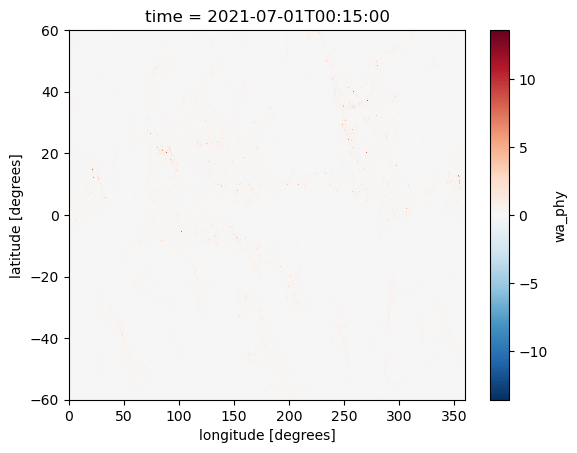

In [9]:
w[0,41:-10].max("level_half").plot()

In [10]:
w.max()

<xarray.DataArray 'wa_phy' ()> Size: 4B
array(13.596753, dtype=float32)

In [11]:
w.data.strides

(364, 4, 5241600, 1456)

In [12]:
w.data = w.data.ravel().reshape(w.shape)

In [13]:
w.data.strides

(1572480000, 17280000, 14400, 4)

In [14]:
import tobac

In [15]:
w_iris = w.isel(level_half=slice(41,-10)).to_iris()

In [16]:
w_iris

<iris 'Cube' of vertical velocity / (m s-1) (time: 4; height: 40; latitude: 1200; longitude: 3600)>

In [17]:
dt = 900  # in seconds
dxy = 11100  # in meter (for Latitude)
dz= 300

parameters_features = dict(
    dxy=dxy,
    dz=dz,
    threshold=[1,2,4,8],
    n_min_threshold=5,
    min_distance=2.5*dxy,
    target="maximum",
    position_threshold="center",
    PBC_flag="hdim_2",
    vertical_coord="height",
    statistic={"w_max": np.nanmax},
)

In [18]:
features_w = tobac.feature_detection_multithreshold(
    w_iris, **parameters_features
)

In [19]:
features_w

,frame,idx,vdim,hdim_1,hdim_2,num,threshold_value,w_max,feature,time,timestr,height,latitude,longitude
0,0,13,2.525000,871.775000,2916.200000,40,1,0.046863,1,2021-07-01 00:15:00,2021-07-01 00:15:00,44.525000,-27.227500,291.670000
1,0,14,2.461538,894.846154,2906.000000,13,1,0.166049,2,2021-07-01 00:15:00,2021-07-01 00:15:00,44.461538,-29.534615,290.650000
2,0,15,4.160000,899.300000,2904.720000,50,1,0.024364,3,2021-07-01 00:15:00,2021-07-01 00:15:00,46.160000,-29.980000,290.522000
3,0,16,2.000000,904.000000,2903.500000,10,1,0.018887,4,2021-07-01 00:15:00,2021-07-01 00:15:00,44.000000,-30.450000,290.400000
4,0,17,7.000000,914.638298,2901.744681,47,1,0.200979,5,2021-07-01 00:15:00,2021-07-01 00:15:00,49.000000,-31.513830,290.224468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6301,3,2683,27.285714,174.571429,2764.571429,7,4,0.000709,6302,2021-07-01 01:00:00,2021-07-01 01:00:00,69.285714,42.492857,276.507143
6302,3,2685,7.500000,320.000000,712.000000,8,8,0.016394,6303,2021-07-01 01:00:00,2021-07-01 01:00:00,49.500000,27.950000,71.250000
6303,3,2686,10.500000,490.000000,1616.000000,6,8,0.089868,6304,2021-07-01 01:00:00,2021-07-01 01:00:00,52.500000,10.950000,161.650000
6304,3,2687,15.882353,462.764706,3449.000000,17,8,0.270994,6305,2021-07-01 01:00:00,2021-07-01 01:00:00,57.882353,13.673529,344.950000


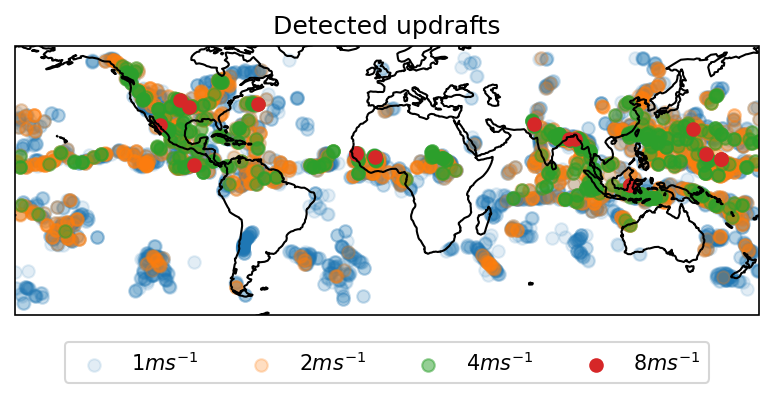

In [20]:
fig, ax = plt.subplots(1, 1, dpi=150, figsize=(6.4, 2.8), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines()
artists = []
for i, t in enumerate([1,2,4,8]):
    wh = features_w.threshold_value == t
    artists.append(
        ax.scatter(features_w[wh].longitude, features_w[wh].latitude, alpha=1/(2**(3-i)))
    )

ax.set_title("Detected updrafts")
fig.legend(artists, ["$1ms^{-1}$", "$2ms^{-1}$", "$4ms^{-1}$", "$8ms^{-1}$"], loc="lower center", ncols=4) 

In [23]:
# cli = ds_icon_inst_1.cli.isel(time=slice(0,4), level_full=slice(40,90), cell=pix)
cli = ds_icon_inst_1.cli.drop_vars("zg").isel(time=slice(0,4)).compute().isel(cell=pix)

In [24]:
cli

<xarray.DataArray 'cli' (time: 4, level_full: 90, lat: 1200, lon: 3600)> Size: 6GB
array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
...
         [5.0295034e-06, 5.8921914e-06, 5.8921914e-06, ...,
          5.4857005e-06, 5.4857005e-06, 5.4118818e-06],
         [2.2818788e-06, 2.2818788e-06, 2.2818788e-06, ...,
          2.6568136e-06, 2.6568136e-06, 2.6568136e-06],
         [2.1360208e-06, 2.1360208e-06, 2.1360208e-06, ...,
          2.4665067e-06, 2.4665067e-06, 2.4665067e-06]],

        [[1.5675198e-16, 1.5675198e-16, 1.5675198e-16, ...,
          1.6278135e-16, 1.6278135e-16, 1.6278135e-16],
         [1.5591545e-16, 1.5591545e-16, 1.5591545e-16, ...,
          1.6539418e-16, 1.6539418e-16, 1.6539418e-16],
         [1.5401195e-16, 1.5233770e-16, 1.5233770e-16, ...,
          1.5188364e-16, 1.5188364e-16, 1.4668277e-16],
         ...,
         [5.0213248e-06, 5.8883297e-06, 5.8883297e-06, ...,
          5.4749921e-06, 5.4749921e-06, 5.4193474e-06],
         [2.1956466e-06, 2.1956466e-06, 2.1956466e-06, ...,
          2.5750132e-06, 2.5750132e-06, 2.5750132e-06],
         [2.0691136e-06, 2.0691136e-06, 2.0691136e-06, ...,
          2.4079720e-06, 2.4079720e-06, 2.4079720e-06]]]], dtype=float32)
Coordinates:
  * level_full  (level_full) int32 360B 1 2 3 4 5 6 7 8 ... 84 85 86 87 88 89 90
  * time        (time) datetime64[ns] 32B 2021-07-01T00:15:00 ... 2021-07-01T...
  * lat         (lat) float64 10kB 59.95 59.85 59.75 ... -59.75 -59.85 -59.95
  * lon         (lon) float64 29kB 0.05 0.15 0.25 0.35 ... 359.8 359.9 360.0
Attributes:
    cell_methods:  time: point
    component:     atmo
    grid_mapping:  crs
    long_name:     specific cloud ice content
    units:         kg kg-1
    vgrid:         reference

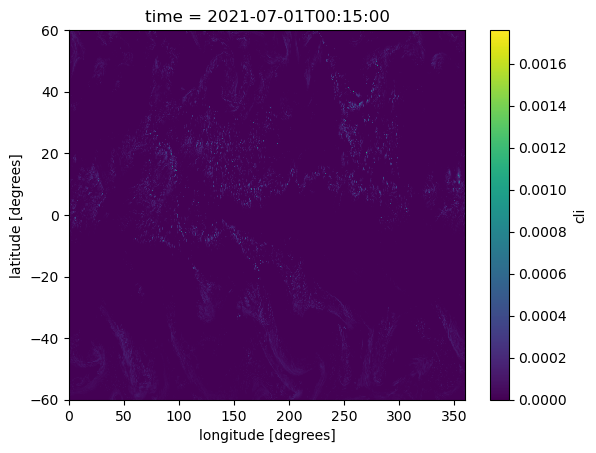

In [25]:
cli[0,40:-10].max("level_full").plot()

In [26]:
cli_iris = cli.isel(level_full=slice(40,-10)).to_iris()
cli_iris

<iris 'Cube' of specific cloud ice content / (kg kg-1) (time: 4; height: 40; latitude: 1200; longitude: 3600)>

In [27]:
parameters_segments = dict(
    threshold=1e-4, target="maximum", PBC_flag="hdim_2", seed_3D_flag="box", seed_3D_size=5, vertical_coord="height"
)

In [28]:
segments_cli, features_cli = tobac.segmentation.segmentation(
    features_w, cli_iris, dxy, **parameters_segments,
)

In [29]:
features_cli

,frame,idx,vdim,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,height,latitude,longitude,ncells
0,0,13,2.525000,871.775000,2916.200000,40,1,1,2021-07-01 00:15:00,2021-07-01 00:15:00,44.525000,-27.227500,291.670000,0
1,0,14,2.461538,894.846154,2906.000000,13,1,2,2021-07-01 00:15:00,2021-07-01 00:15:00,44.461538,-29.534615,290.650000,0
2,0,15,4.160000,899.300000,2904.720000,50,1,3,2021-07-01 00:15:00,2021-07-01 00:15:00,46.160000,-29.980000,290.522000,0
3,0,16,2.000000,904.000000,2903.500000,10,1,4,2021-07-01 00:15:00,2021-07-01 00:15:00,44.000000,-30.450000,290.400000,0
4,0,17,7.000000,914.638298,2901.744681,47,1,5,2021-07-01 00:15:00,2021-07-01 00:15:00,49.000000,-31.513830,290.224468,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6301,3,2683,27.285714,174.571429,2764.571429,7,4,6302,2021-07-01 01:00:00,2021-07-01 01:00:00,69.285714,42.492857,276.507143,0
6302,3,2685,7.500000,320.000000,712.000000,8,8,6303,2021-07-01 01:00:00,2021-07-01 01:00:00,49.500000,27.950000,71.250000,252
6303,3,2686,10.500000,490.000000,1616.000000,6,8,6304,2021-07-01 01:00:00,2021-07-01 01:00:00,52.500000,10.950000,161.650000,314
6304,3,2687,15.882353,462.764706,3449.000000,17,8,6305,2021-07-01 01:00:00,2021-07-01 01:00:00,57.882353,13.673529,344.950000,1434


In [30]:
segments_cli

<iris 'Cube' of segmentation_mask / (1) (time: 4; height: 40; latitude: 1200; longitude: 3600)>

In [31]:
features_cli[features_cli.ncells>0]

,frame,idx,vdim,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,height,latitude,longitude,ncells
11,0,123,11.276923,330.846154,1263.030769,65,1,12,2021-07-01 00:15:00,2021-07-01 00:15:00,53.276923,26.865385,126.353077,305
12,0,134,10.607843,391.705882,2586.313726,51,1,13,2021-07-01 00:15:00,2021-07-01 00:15:00,52.607843,20.779412,258.681373,168
13,0,137,12.582278,411.886076,2577.708861,79,1,14,2021-07-01 00:15:00,2021-07-01 00:15:00,54.582278,18.761392,257.820886,174
14,0,138,10.323529,413.000000,2597.117647,34,1,15,2021-07-01 00:15:00,2021-07-01 00:15:00,52.323529,18.650000,259.761765,263
15,0,140,10.688525,465.032787,2580.606557,61,1,16,2021-07-01 00:15:00,2021-07-01 00:15:00,52.688525,13.446721,258.110656,389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6278,3,2651,19.500000,631.000000,751.000000,6,4,6279,2021-07-01 01:00:00,2021-07-01 01:00:00,61.500000,-3.150000,75.150000,35
6302,3,2685,7.500000,320.000000,712.000000,8,8,6303,2021-07-01 01:00:00,2021-07-01 01:00:00,49.500000,27.950000,71.250000,252
6303,3,2686,10.500000,490.000000,1616.000000,6,8,6304,2021-07-01 01:00:00,2021-07-01 01:00:00,52.500000,10.950000,161.650000,314
6304,3,2687,15.882353,462.764706,3449.000000,17,8,6305,2021-07-01 01:00:00,2021-07-01 01:00:00,57.882353,13.673529,344.950000,1434
